In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Ejercicio 2.18

Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{n \times n}$ como el máximo del valor $ \frac{\|Ax\|_2}{\|x\|_2} $ entre varios vectores $ x \in \mathbb{R}^3 $ no nulos generados al azar.

##### Instrucciones

Hacer un programa que reciba una matriz $A$ y luego:

   - Genere los primeros 100 términos de la siguiente sucesión:
   <p style="text-align:center;">   $s_1 = 0$ , $s_{k+1} = \max\{s_k, \frac{\|Ax_k\|_2}{\|x_k\|_2}\} $ </p>
   
   donde los $ x_k \in \mathbb{R}^3 $ son vectores no nulos generados al azar en la bola unitaria: $B = \{x : \|x\|_2 \leq 1\} $.
   - Grafique la sucesión calculada, junto con el valor exacto de la norma 2 de la matriz.

###### Notas

- La norma 2 puede calcularse con el comando `np.linalg.norm`.
- Los vectores generados al azar con `np.random.random` tienen coordenadas en el intervalo [0,1].



In [147]:
## calcular |A| = max {||Ax||/||x||} con x no nulo. 

def estimacionNorma2(A: list[list[float]]):
    s = 0
    x_sucesion = np.zeros(100)
    error_sucesion = np.zeros(100)

    for k in range(100):
        vector = np.random.random(3)
        norma2_Ax = np.linalg.norm(A@vector,2)
        res = norma2_Ax / np.linalg.norm(vector, 2)
        s = max(s, res)
        x_sucesion[k] += s
        error_sucesion[k] += (np.linalg.norm(A,2) - x_sucesion[k])/100
        
    print(x_sucesion[99])
    print("norma 2 exacta:", np.linalg.norm(A,2))
    print("error relativo:", '%.5f'%((np.linalg.norm(A,2) - x_sucesion[99])/100,),"%")
    print("error absoluto:", np.linalg.norm(A,2) - x_sucesion[99])

    x = np.arange(0,100)
    plt.title("Aproximacion de norma-2 de A luego de 100 iteraciones")
    plt.xlabel("Iteracion")
    plt.ylabel("Valor de Norma 2")
    plt.plot(x, x_sucesion, label="Aproximacion")
    plt.plot(x, np.zeros(100) + np.linalg.norm(A,2), label="Valor exacto")    
    plt.legend(loc="lower right")          

8.642486755863736
norma 2 exacta: 8.666597613856615
error relativo: 0.00024 %
error absoluto: 0.02411085799287882


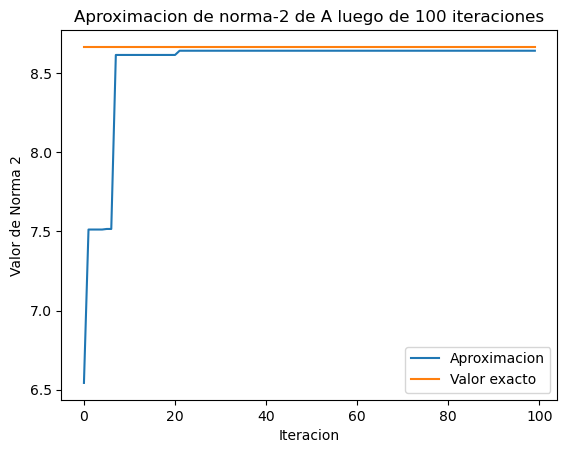

In [148]:
A = [[1,2,4],[4,5,1],[0,5,2]]
estimacionNorma2(A)

#### Ejercicio 3.3

Escribir funciones de <code>Python</code> que calculen la solucion de un sistema:

a) $Ly = b$, siendo $L$ triangular inferior.

b) $Ux = y$, siendo $U$ triangular superior.

In [129]:
def solveLy(L: np.array, b:np.array) -> np.array:
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        sum_ = 0 
        for j in range(i):
            sum_ += L[i][j]*y[j]
        y[i] = (b[i] - sum_ ) / L[i][i]
    return y

def solveUx(U: np.array, x:np.array) -> np.array:
    n = U.shape[0]
    x = np.zeros(n)
    for i in range(n):
        sum_ = 0 
        for j in range(i+1):
            sum_ += U[i][j] * x[j]
        x[i] = (y[i] - sum_)/U[i][i]
    return x
    
L = np.array([[1,0,0],
              [1,2,0],
              [2,1,4]])
U = np.array([[1,2,5],
              [0,2,1],
              [0,0,1]])
b = np.array([1,2,3])

print(y := solveLy(L, b.T))
print(x := solveUx(U, y.T))

[1.    0.5   0.125]
[1.    0.25  0.125]


#### Ejercicio 3.4

Escribir funciones de <code>Python</code> que realicen las siguientes tareas: 

(a) Calcular la descomposicion $LU$ de una matriz dada $A$, asumiendo que no es necesario realizar pivoteos. 

(b) Resolver un sistema $Ax = b$, utilizando la funcion del ıtem anterior y las del ejercicio 3.3. Aplicar esta funcion para resolver el ıtem (c) del ejercicio 2

In [142]:
def doolittleLU(A: np.array) -> tuple[np.array, np.array]:
    n = len(A)
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i,n):
            U[i,j] = A [i,j] - sum(L[i,k] * U[k,j] for k in range(i))
        for j in range(i, n):
            if (i == j):
                L[i,i] = 1
            else:
                L[j,i] = (A[j,i] - sum(L[j,k] * U[k,i] for k in range(i))) / U[i,i]
    return L, U



In [143]:
A = np.array([[3,2,3],[6,2,2],[5,6,3]])
L, U = doolittleLU(np.array([[3,2,3],[6,2,2],[5,6,3]]))
         
print(L)
print(U)

[[ 1.          0.          0.        ]
 [ 2.          1.          0.        ]
 [ 1.66666667 -1.33333333  1.        ]]
[[ 3.          2.          3.        ]
 [ 0.         -2.         -4.        ]
 [ 0.          0.         -7.33333333]]


In [146]:
L@U == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Felicidad :thumbsup:

#### Ejercicio 3.20

Sea $u \in \mathbb{R}^n$ un vector tal que $\|u\|_2 = 1$ y sea $H = I - 2uu^T$ un reflector ortogonal de Householder.

##### Parte (a)

Siendo $u = e_i$, calcular explícitamente $H$ e interpretar geométricamente $Hx$ para cualquier $x \in \mathbb{R}^n$.

##### Parte (b)

Sea $x$ tal que $x = w + v$, con $w$ ortogonal a $u$ y $v$ múltiplo de $u$. Mostrar que 

<p style="text-align:center;">$Hx = w - v$
</p>


e interpretar geométricamente en $\mathbb{R}^n$.


In [194]:
# Parte (a) del enunciado
def hhCanon(dim: int, i: int):
    n = dim
    I = np.identity(n)
    # fix solidisimo (n) -> ((n,1))
    u = np.zeros((n,1)) 
    u[i] = 1
    H = I - (2 * u @ u.T)
    return H

In [195]:
hhCanon(4,1)

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Funciona!!

In [196]:
def intGeomHH(dim: int, i:int, x: np.array):
    H = hhCanon(dim, i)
    reflexionHH = H @ x
    plt.figure(figsize=(6,6))
    
    # plotear el vector original
    plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector original $x$')
    
    # plotear el vector reflejado
    plt.quiver(0, 0, reflexionHH[0], reflexionHH[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector reflejado $Hx$')
    
    # plotear la linea de reflexion
    if dim == 2:
        # tuvo que cookear gpt pues no le se al quiver
        u = np.zeros(dim)
        u[i] = 1
        line_start = np.array([-1, 1])
        line_end = np.array([1, -1])     
        
        line_vector = np.array([-u[1], u[0]])  
        line_length = 2
        plt.quiver(0, 0, line_vector[0], line_vector[1], angles='xy', scale_units='xy', scale=line_length, color='g', label='Linea de reflexion')

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Interpretacion geometrica de la reflexion de Householder')
    plt.legend()
    plt.show()

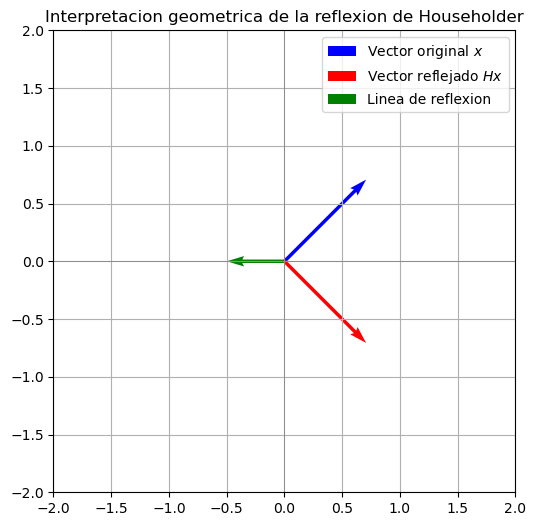

In [199]:
i = 1 
x = np.array([0.707,0.707]) # sin 45, cos 45 muak
intGeomHH(2, i, x)

#### Ejercicio 3.21

Implementar dos programas que calculen la descomposición QR de una matriz:

(a) Aplicando de manera directa el método de ortonormalización de Gram-Schmidt.

(b) Utilizando transformaciones de Householder.

Generar algunas matrices aleatorias y comparar las descomposiciones arrojadas por estos programas con las dadas por el comando `np.linalg.qr`. ¿Qué se observa?


#### Ejercicio 3.22

Implementar un programa que resuelva un sistema $Ax = b$ a partir de la descomposición QR de $A$.


#### Ejercicio 4.15

Un sujeto en evidente estado de ebriedad oscila entre su casa y el bar, separados por $n$ pasos. En cada instante de tiempo da un paso hacia adelante (acercándose a su casa), con probabilidad $p$; y hacia atrás (acercándose nuevamente al bar), con probabilidad $1-p$. Si llega a alguno de los dos extremos, se queda allí y no vuelve a moverse. 

 (a) Sin hacer ninguna cuenta, mostrar que el proceso admite al menos dos estados límite linealmente independientes entre sí. Implementar un programa que reciba como input la distancia entre la casa y el bar ($n$) y la probabilidad $p$, y devuelva la matriz de transición del proceso. Verificar que el resultado sea correcto corriendo lo para $n=5$ y $p=0.5$.

 (b) Para $n=20$, tomar $p=0.5$ y $v_0$ el vector que corresponde a ubicar al sujeto en cualquiera de los puntos intermedios del trayecto con igual probabilidad. Realizar una simulación del proceso hasta que se estabilice. ¿Cuál es el estado límite? ¿Cómo se interpreta?

 (c) Repetir la simulación tomando como vector inicial $v_0=e_2$ (el segundo canónico). Interpretar el resultado.

 (d) Repetir las simulaciones con $p=0.8$. ¿Qué se observa?

 (e) Explicar los resultados de todas las simulaciones a partir del análisis de los autovalores y autovectores de la matriz.


#### Ejercicio 4.18

Implementar el método de la potencia tal como está descrito en el ejercicio anterior, para calcular el autovalor de máximo módulo, $conv(0)$ aleatorio y $\phi$ una funcional lineal cualquiera.

Aplicarlo para calcular el autovalor de máximo módulo de la siguiente matriz:

$$
A = \begin{pmatrix}
1 & 2 & 1 \\
1 & -1 & 1 \\
1 & 5 & 1
\end{pmatrix}
$$

Comparar con el resultado arrojado por `np.linalg.eig`.


#### Ejercicio 4.21

##### Método de la potencia inversa

1. Mostrar que si $\lambda$ es un autovalor de $A$, y $A$ es inversible, entonces $\lambda^{-1}$ es un autovalor de $A^{-1}$.

2. En el método de la potencia inversa, se define $v^{(k+1)}$ tal que $Av^{(k+1)} = v^{(k)}$. 

   Mostrar que esta modificación del método de la potencia permite calcular el autovalor de menor módulo de $A$.

3. Implementar el método de la potencia inversa.


#### Ejercicio 4.23

Asumiendo que $ A $ admite un único autovalor de módulo máximo:

 (a)
Usando que $ \|A\|_2 = \rho(A^TA) $ para una $ A $ cualquiera y $ \|A\|_2 = \rho(A) $ si $ A $ es simétrica, adapta el método de la potencia para calcular la norma 2 de $ A $

 (b)
Escribir un programa que, utilizando el ítem anterior y el método de la potencia inversa, calcule $ \text{cond}_2(A) $.

 (c)
Calcular $ \text{cond}_2(A) $ de las matrices del Hilbert para $ n = 10, 100, 500, 1000 $. La matriz de Hilbert de tamaño $ n $ puede calcularse como:

```python
import scipy as sp
# Definir n
H = sp.linalg.hilbert(n)
```

#### Ejercicio 5.19

Descargar la imagen `quijote.jpg` y utilizar el comando `imread` de la librería `matplotlib.pyplot` para cargarla. Imprimir el resultado. Mostrar la imagen utilizando el comando `imshow`. Probablemente, la gama de colores por defecto no sea en blanco y negro. Ejecutar el siguiente comando:

```python
from matplotlib import cm
```
y volver a correr `imshow`, esta vez con la opción `cmap="gray"`. (Buscando "matplotlib colormaps" se encuentran fácilmente distintos mapas de colores para graficar).

#### Ejercicio 5.20

Escribir un programa que reciba como input una matriz $A \in \mathbb{R}^{n \times m}$ y un entero positivo $r$ y:

- Calcule la descomposición en valores singulares de $A$, utilizando el comando `np.linalg.svd` o el comando `scipy.linalg.svd`. Ambos comandos devuelven $U \in \mathbb{R}^{n \times n}$, $V \in \mathbb{R}^{m \times m}$ y $s \in \mathbb{R}^{\min(n,m)}$, de manera tal que $A = U \, \text{diag}(s) \, V$.
  
- Devuelva: una tupla con la dimensión original de la matriz $A$ $(n, m)$, las matrices $\tilde{U} \in \mathbb{R}^{n \times r}$ y $\tilde{V} \in \mathbb{R}^{r \times m}$ que surgen de eliminar de $U$ y $V$ los vectores singulares con índice mayor a $r$, y el vector de valores singulares $\tilde{s} \in \mathbb{R}^r$, también recortado.


#### Ejercicio 5.21

Escribir un programa que reconstruya la matriz a partir del output del programa anterior. Es decir, que:

- Reciba el tamaño $(n,m)$, las matrices $\tilde{U}$ y $\tilde{V}$, y el vector $\tilde{s}$.
  
- Amplíe las matrices con ceros, generando $U' \in \mathbb{R}^{n \times n}$, $V' \in \mathbb{R}^{m \times m}$; y coloque $\tilde{s}$ en la diagonal de una matriz $\Sigma' \in \mathbb{R}^{n \times m}$.
  
- Devuelva la matriz $B = U' \Sigma' V'$ (que es la mejor aproximación a $A$ entre las matrices de rango $r$).


#### Ejercicio 5.22

Aplicar los programas anteriores a la imagen del ejemplo (y eventualmente a otras). El output del primer programa corresponderá a la imagen comprimida; sólo se almacenan: una tupla con dos números $((n,m))$, $r$ vectores de longitud $n$, $r$ vectores de longitud $m$ y $r$ valores singulares. El segundo programa abre los datos comprimidos y muestra la imagen.

Naturalmente, la compresión implica la pérdida de información (y por lo tanto, de calidad en la imagen). Experimentar con distintos valores de $r$. Se puede estudiar la calidad de la aproximación a través del error relativo:

$$
\frac{\|A - A_r\|_2}{\|A\|_2} = \frac{\sigma_{r+1}}{\sigma_1}.
$$

Para analizar la proporción de compresión se puede calcular el cociente entre la cantidad de datos almacenados por la matriz original $(mn)$ y los datos almacenados por las matrices comprimidas $((m+n)r + r + 2)$. Calcular el error relativo de aproximación y la proporción de compresión para distintos valores de $r$.

#### Ejercicio 5.23

La misma idea puede utilizarse con imágenes en color. Al leer una imagen color, `imread` genera un array $A$ tridimensional, de $n \times m \times 3$. $A[:,:,0]$, $A[:,:,1]$ y $A[:,:,2]$ son los canales RGB (en ese orden) de la imagen.

Experimentar con alguna imagen color realizando la compresión en cada una de las componentes (puede ser con parámetros $r_i$ distintos) y reensamblando el array tridimensional.
